# Heart Disease Prediction
Heart disease is the leading cause of death for people of most racial and ethnic groups in the United States, including African American, American Indian, Alaska Native, Hispanic, and white men. For women from the Pacific Islands and Asian American, American Indian, Alaska Native, and Hispanic women, heart disease is second only to cancer.

* One person dies every 37 seconds just in the United States alone from cardiovascular disease.
* About 647,000 Americans die from heart disease each year—that’s 1 in every 4 deaths.
* Heart disease costs the United States about $219 billion each year from 2014 to 2015. This includes the cost of health care services, medicines, and lost productivity due to death.


## Problem Definition

* Complete analysis of Heart Disease UCI dataset.
* To predict whether a person has a heart disease or not based on the various biological and physical parameters. 

## 1. Data Collection
The data used for training and testing is the [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) downloaded from Kaggle.  


In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=2)

In [3]:
#reading csv file
data = pd.read_csv("heart_dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


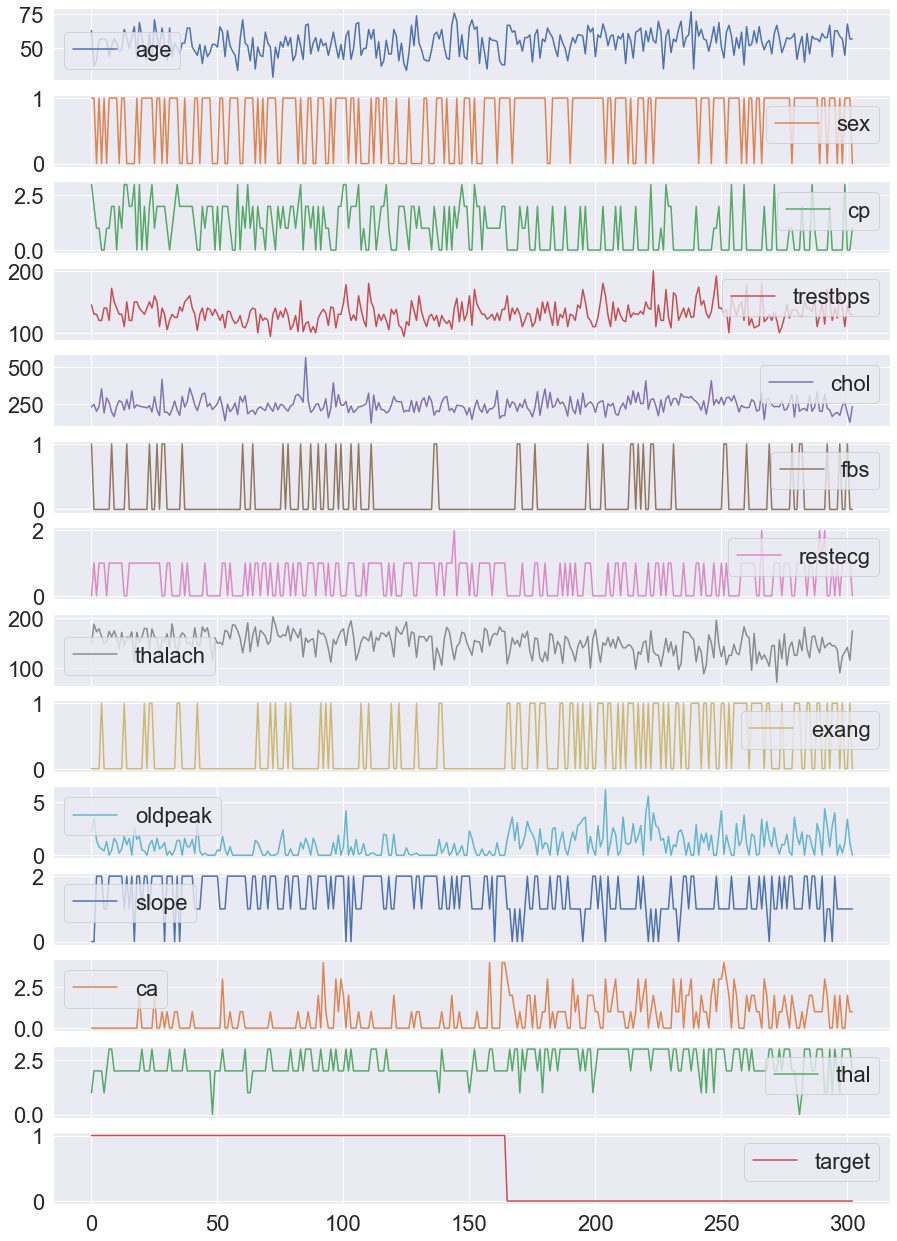

In [4]:
#plots of entire dataset
data.plot(subplots=True,figsize=(15,22))
plt.show()

## 2. Data Analysis and Preprocessing
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [5]:
#print columns and shape of dataset
print(data.columns)
print(data.shape)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


In [6]:
#print dataset head
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#print dataset tail
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#print dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#print datatypes of columns in dataset
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
#display uniques values from all columns
categorical_values = []
for column in data.columns:
    print('===========================================================================================')
    print(" "f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)
print('===========================================================================================')

 age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
 sex : [1 0]
 cp : [3 2 1 0]
 trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
 chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


In [13]:
#display categorial values
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
#find missing values
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#display sum of mising values from each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

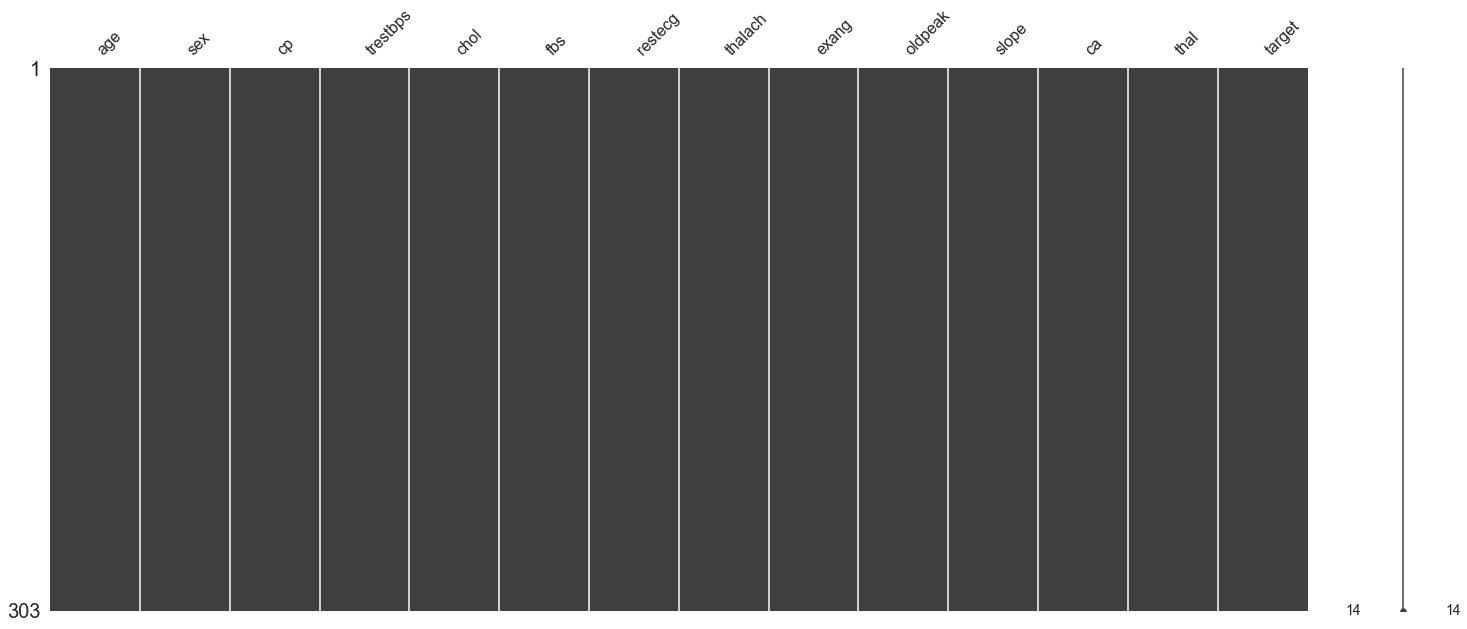

In [16]:
#plot to check null values
import missingno as msno
msno.matrix(data);

From above output and plot we can see there are no null values in the dataset.

In [17]:
#check duplicates
duplicated = data.duplicated().sum()
if duplicated:
    print('Duplicate rows in Dataset are : {}'.format(duplicated))
else:
    print('Dataset contains no duplicate values')

Duplicate rows in Dataset are : 1


In [18]:
#display duplicate rows
data.loc[data.duplicated(), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


In [19]:
#drop duplicate rows
data.drop_duplicates(inplace=True)

In [20]:
#recheck duplicates
duplicated = data.duplicated().sum()
if duplicated:
    print('Duplicate rows in Dataset are : {}'.format(duplicated))
else:
    print('Dataset contains no duplicate values')

Dataset contains no duplicate values


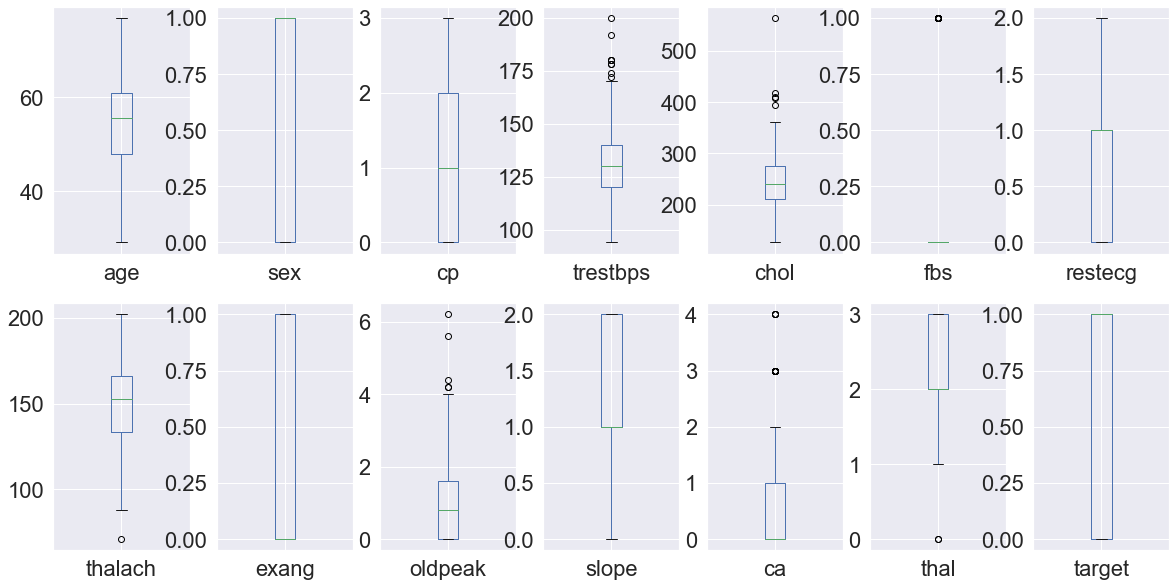

In [21]:
#boxplots for checking outliers
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10));

In [22]:
#function to check and remove outliers
#from above plot we can see that age,trestbps,chol,thalach,oldpeak are the continuous features
continous_features = ['age','trestbps','chol','thalach','oldpeak'] 
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, the number of Outliers is : {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

#check for outliers
outliers(data[continous_features])

For the feature age, the number of Outliers is : 0
For the feature trestbps, the number of Outliers is : 9
For the feature chol, the number of Outliers is : 5
For the feature thalach, the number of Outliers is : 1
For the feature oldpeak, the number of Outliers is : 5


In [23]:
#remove all outliers
outliers(data[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


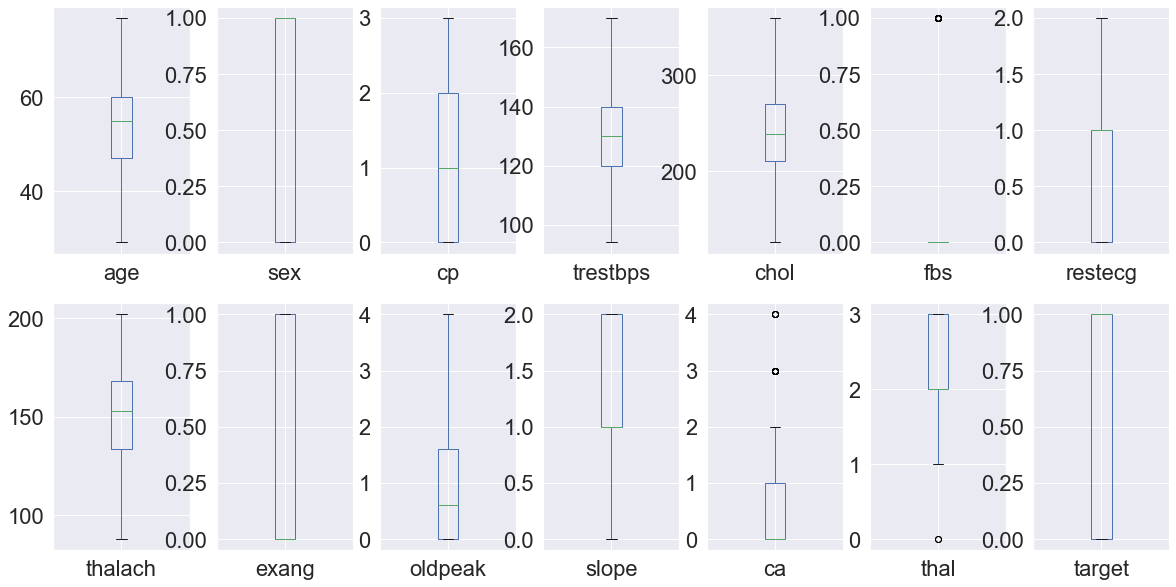

In [24]:
#boxplot to recheck for outliers
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10));

## **3. Statistics**
Here are some of the statistics for the heart dataset

In [17]:
#print dataset description
import statistics
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [20]:
#display sum of all columns
data.sum()

age        16473.00
sex          207.00
cp           293.00
trestbps   39882.00
chol       74618.00
fbs           45.00
restecg      160.00
thalach    45343.00
exang         99.00
oldpeak      315.00
slope        424.00
ca           221.00
thal         701.00
target       165.00
dtype: float64

In [23]:
#display minimum of all columns
data.min()

age         29.00
sex          0.00
cp           0.00
trestbps    94.00
chol       126.00
fbs          0.00
restecg      0.00
thalach     71.00
exang        0.00
oldpeak      0.00
slope        0.00
ca           0.00
thal         0.00
target       0.00
dtype: float64

In [24]:
#display maximum of all columns
data.max()

age         77.00
sex          1.00
cp           3.00
trestbps   200.00
chol       564.00
fbs          1.00
restecg      2.00
thalach    202.00
exang        1.00
oldpeak      6.20
slope        2.00
ca           4.00
thal         3.00
target       1.00
dtype: float64

In [11]:
#display means of all columns
data.mean()

age         54.37
sex          0.68
cp           0.97
trestbps   131.62
chol       246.26
fbs          0.15
restecg      0.53
thalach    149.65
exang        0.33
oldpeak      1.04
slope        1.40
ca           0.73
thal         2.31
target       0.54
dtype: float64

In [12]:
#display median of all columns
data.median()

age         55.00
sex          1.00
cp           1.00
trestbps   130.00
chol       240.00
fbs          0.00
restecg      1.00
thalach    153.00
exang        0.00
oldpeak      0.80
slope        1.00
ca           0.00
thal         2.00
target       1.00
dtype: float64

In [13]:
#display mode of all columns
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.00,1.00,0.00,120.00,197,0.00,1.00,162.00,0.00,0.00,2.00,0.00,2.00,1.00
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#diplay midrange of all columns
(data.min()+data.max())/2

age         53.00
sex          0.50
cp           1.50
trestbps   147.00
chol       345.00
fbs          0.50
restecg      1.00
thalach    136.50
exang        0.50
oldpeak      3.10
slope        1.00
ca           2.00
thal         1.50
target       0.50
dtype: float64

In [15]:
#display standard deviation of all columns
data.std()

age         9.08
sex         0.47
cp          1.03
trestbps   17.54
chol       51.83
fbs         0.36
restecg     0.53
thalach    22.91
exang       0.47
oldpeak     1.16
slope       0.62
ca          1.02
thal        0.61
target      0.50
dtype: float64

In [19]:
#display variance of all columns
data.var()

age          82.48
sex           0.22
cp            1.07
trestbps    307.59
chol       2686.43
fbs           0.13
restecg       0.28
thalach     524.65
exang         0.22
oldpeak       1.35
slope         0.38
ca            1.05
thal          0.37
target        0.25
dtype: float64

## 4. Data Visualization
Now let see various visual representations of the data to understand more about relationship between various feautures.

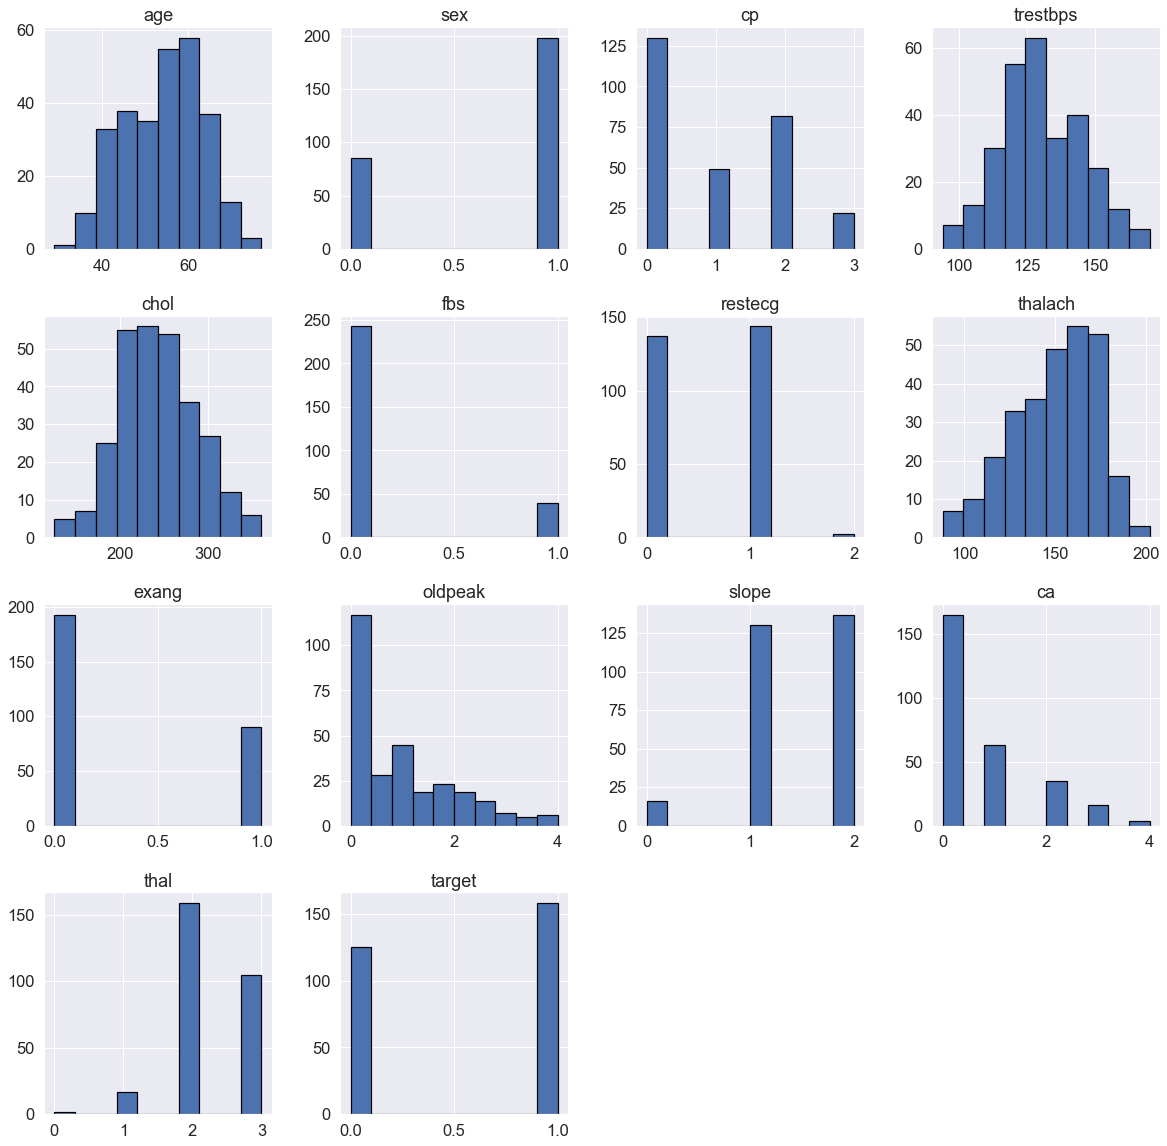

In [25]:
#display histograms for each column
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

From above histograms we can see that features age, chol, oldpeak, trestbps and thalach are continuous variables.\
Also, from thses plots we can observe normal distribution for age, trestbps and almost for chol, oldpeak is left-skewed
and thalach is right-skewed.

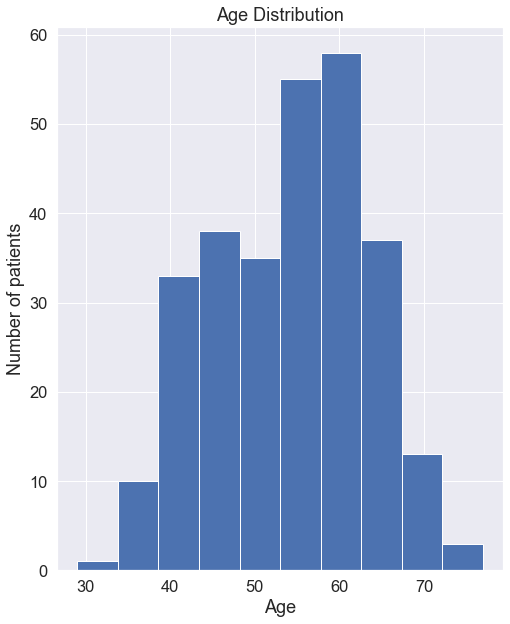

In [26]:
#histogram for distribution of patients over various age groups
plt.figure(figsize=(8, 10))
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age Distribution')
plt.hist(data.age);

In [27]:
print(f"The mean age of patients : {data.age.mean()}")

The mean age of patients : 54.04946996466431


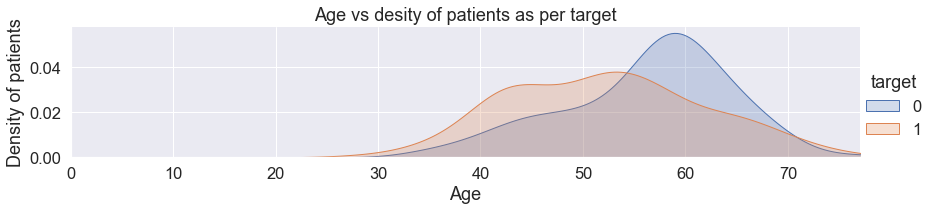

In [28]:
#kdeplot for density of patients over various age groups which have heart disease or not
fig = sns.FacetGrid(data, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
fig.set_axis_labels('Age', 'Density of patients')
plt.title('Age vs desity of patients as per target');

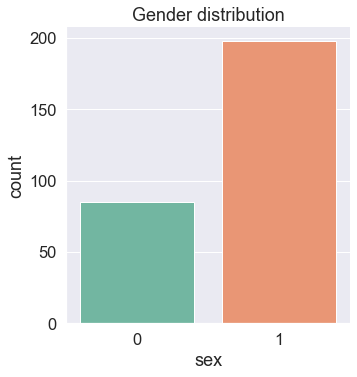

In [29]:
#catplot for gender count 
sns.catplot(x='sex', data=data, kind='count',palette='Set2');
plt.title('Gender distribution');

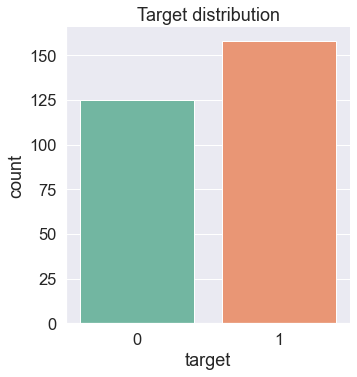

In [30]:
#catplot for count of people having heart disease or not
sns.catplot(x='target', data=data, kind='count',palette='Set2');
plt.title('Target distribution');

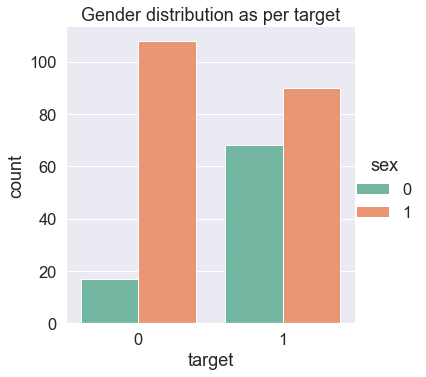

In [31]:
#catplot for gender count having heart disease or not
sns.catplot(x='target', data=data, hue='sex', kind='count',palette='Set2');
plt.title('Gender distribution as per target');

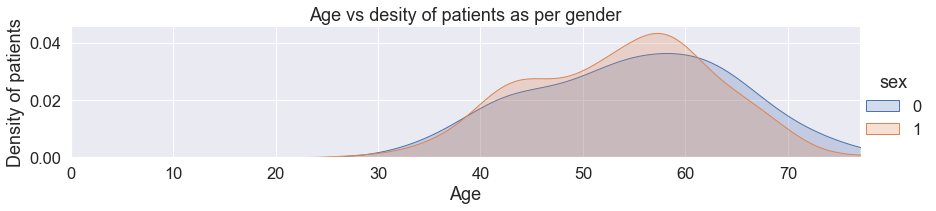

In [32]:
#kdeplot for density of male and female patients over various age groups 
fig = sns.FacetGrid(data, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
fig.set_axis_labels('Age', 'Density of patients')
plt.title('Age vs desity of patients as per gender');

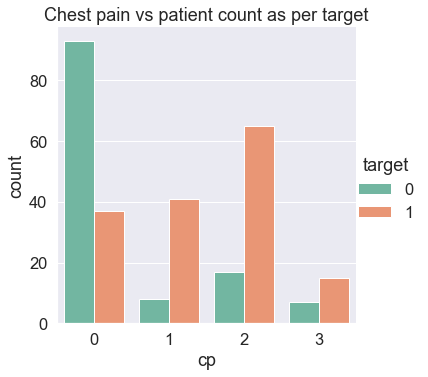

In [33]:
#catplot for cp count having heart disease or not
sns.catplot(x='cp', data=data, hue='target', kind='count',palette='Set2')
plt.title('Chest pain vs patient count as per target');

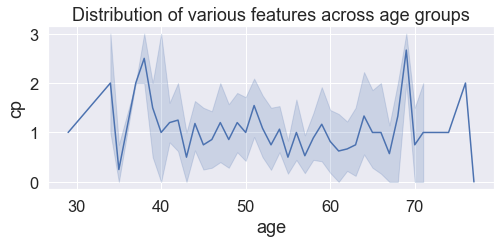

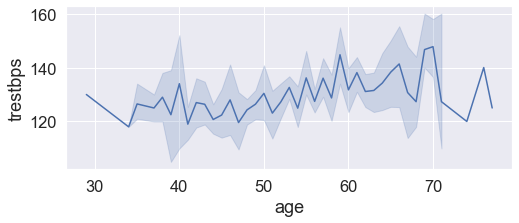

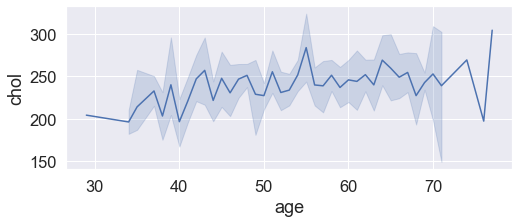

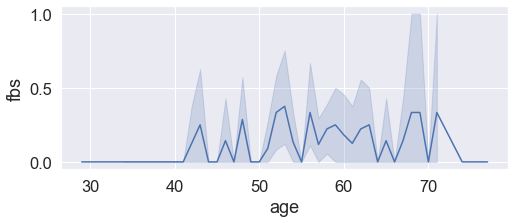

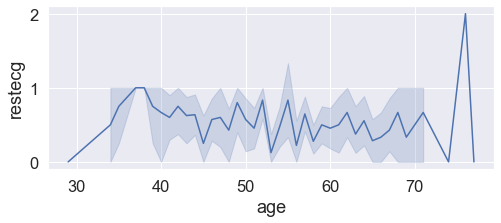

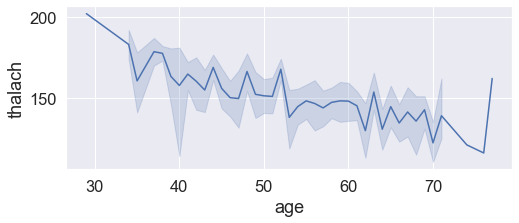

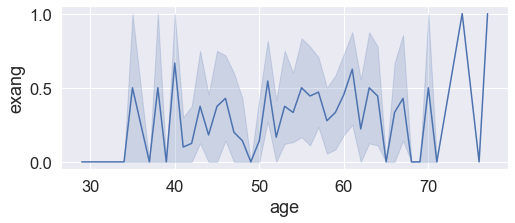

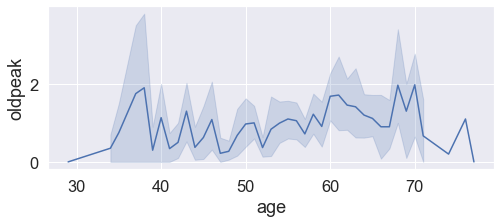

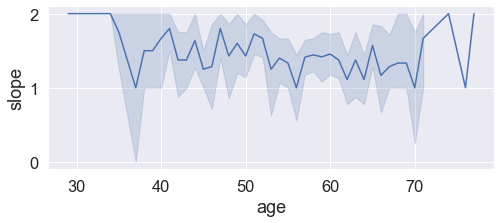

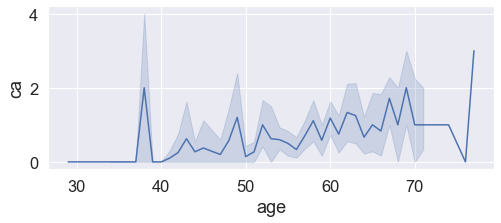

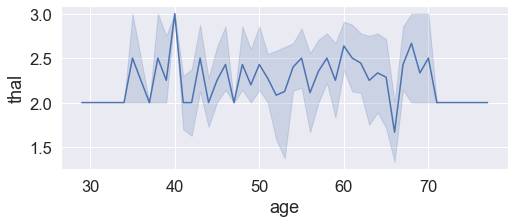

In [34]:
#distribution of various features across age groups

plt.figure(figsize=(8,3))
plt.title('Distribution of various features across age groups')
sns.lineplot(x = 'age', y = 'cp', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'trestbps', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'chol', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'fbs', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'restecg', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'thalach', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'exang', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'oldpeak', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'slope', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'ca', data = data)
plt.show();

plt.figure(figsize=(8,3))
sns.lineplot(x = 'age', y = 'thal', data = data)
plt.show();

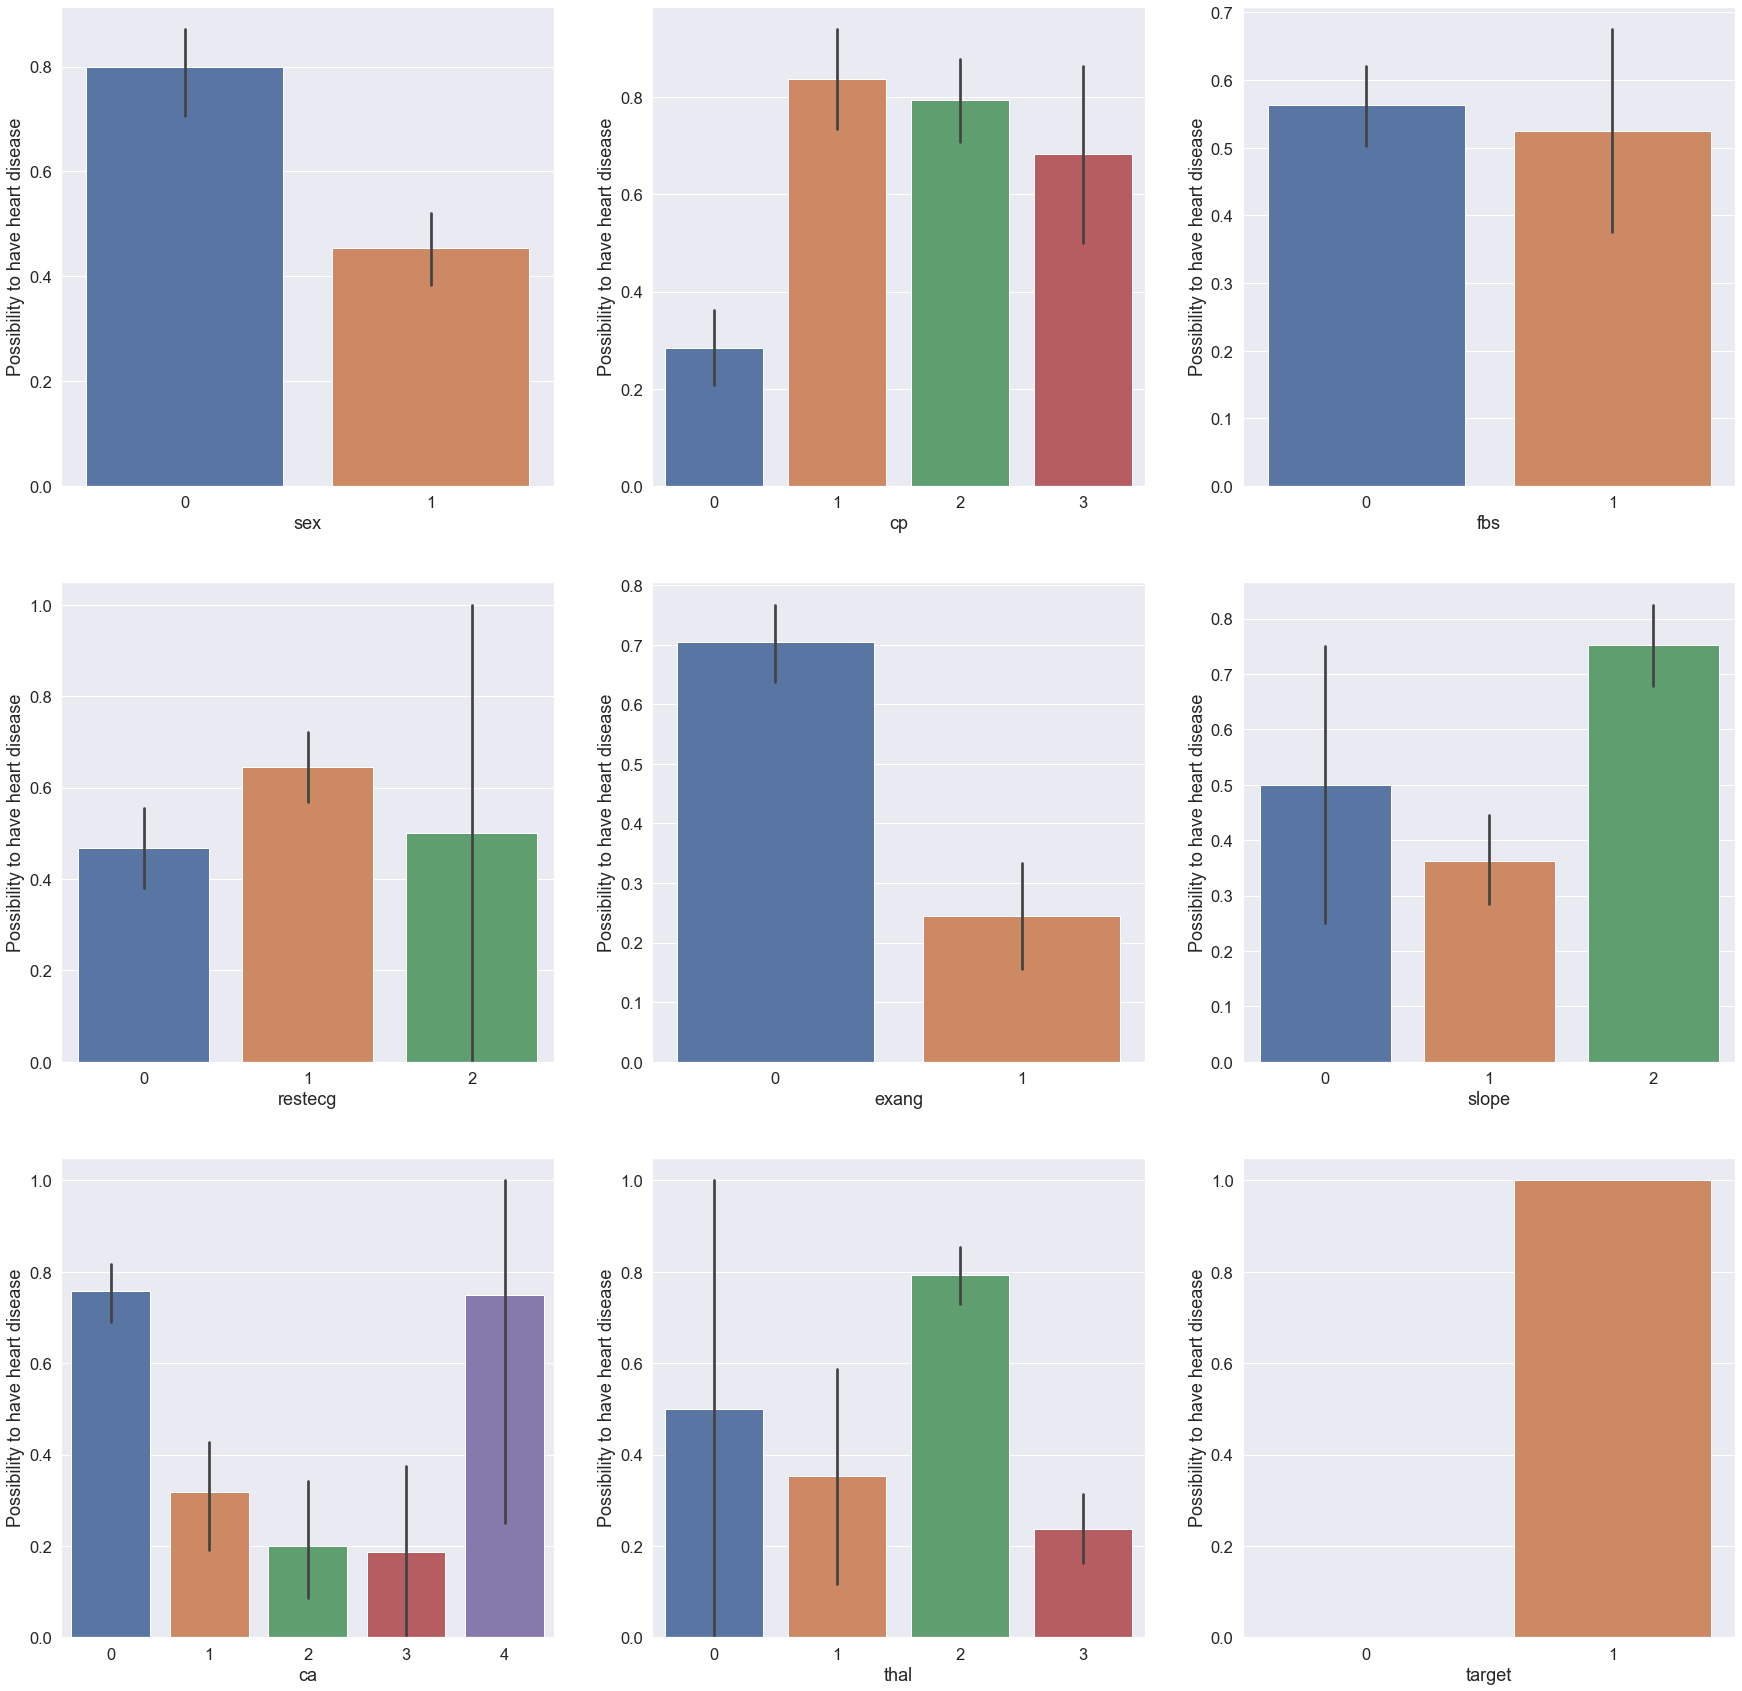

In [35]:
#barplots to show possibility of heart disease for every feature
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=data)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

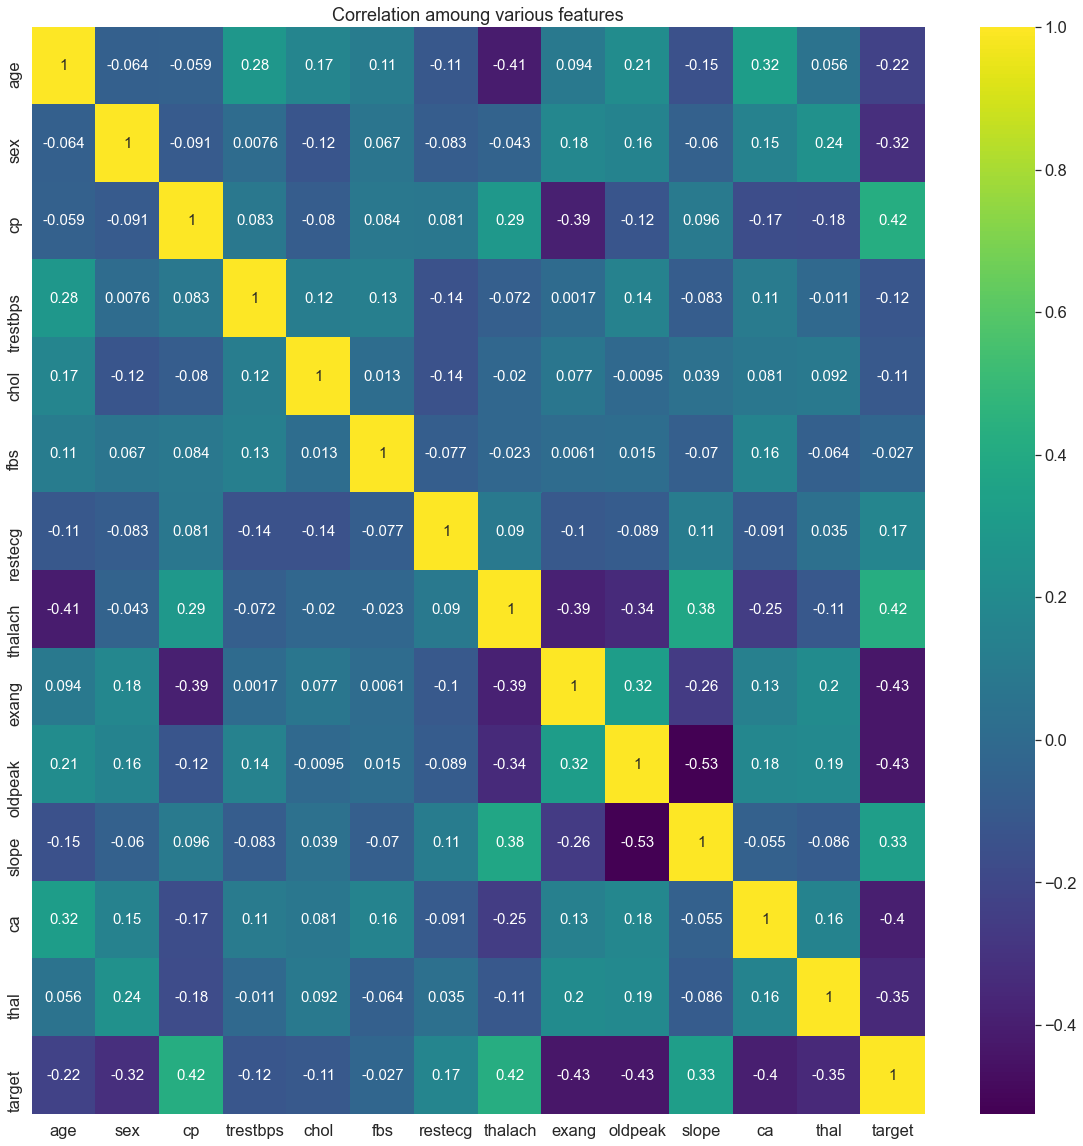

In [36]:
#correlation matrix and plotting heatmap for dataset
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_feature].corr(), annot=True,cmap="viridis", annot_kws={"size":15});
plt.title('Correlation amoung various features');

## **5. Data Processing and Train-Test split**

In [37]:
# extracting appropriate features by droping columns
df = data.dropna()
df = df.drop(columns = ['oldpeak', 'slope', 'ca', 'thal', 'fbs', 'restecg', 'exang'])
df = df.rename(columns = {'age': 'Age', 'sex': 'Gender', 'cp': 'Chest_pain', 'trestbps': 'Blood_pressure', 'chol': 'Cholestrol_level', 'thalach': 'Max_heart_rate', })
df

,Age,Gender,Chest_pain,Blood_pressure,Cholestrol_level,Max_heart_rate,target
0,63,1,3,145,233,150,1
1,37,1,2,130,250,187,1
2,41,0,1,130,204,172,1
3,56,1,1,120,236,178,1
4,57,0,0,120,354,163,1
...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,0
299,45,1,3,110,264,132,0
300,68,1,0,144,193,141,0
301,57,1,0,130,131,115,0


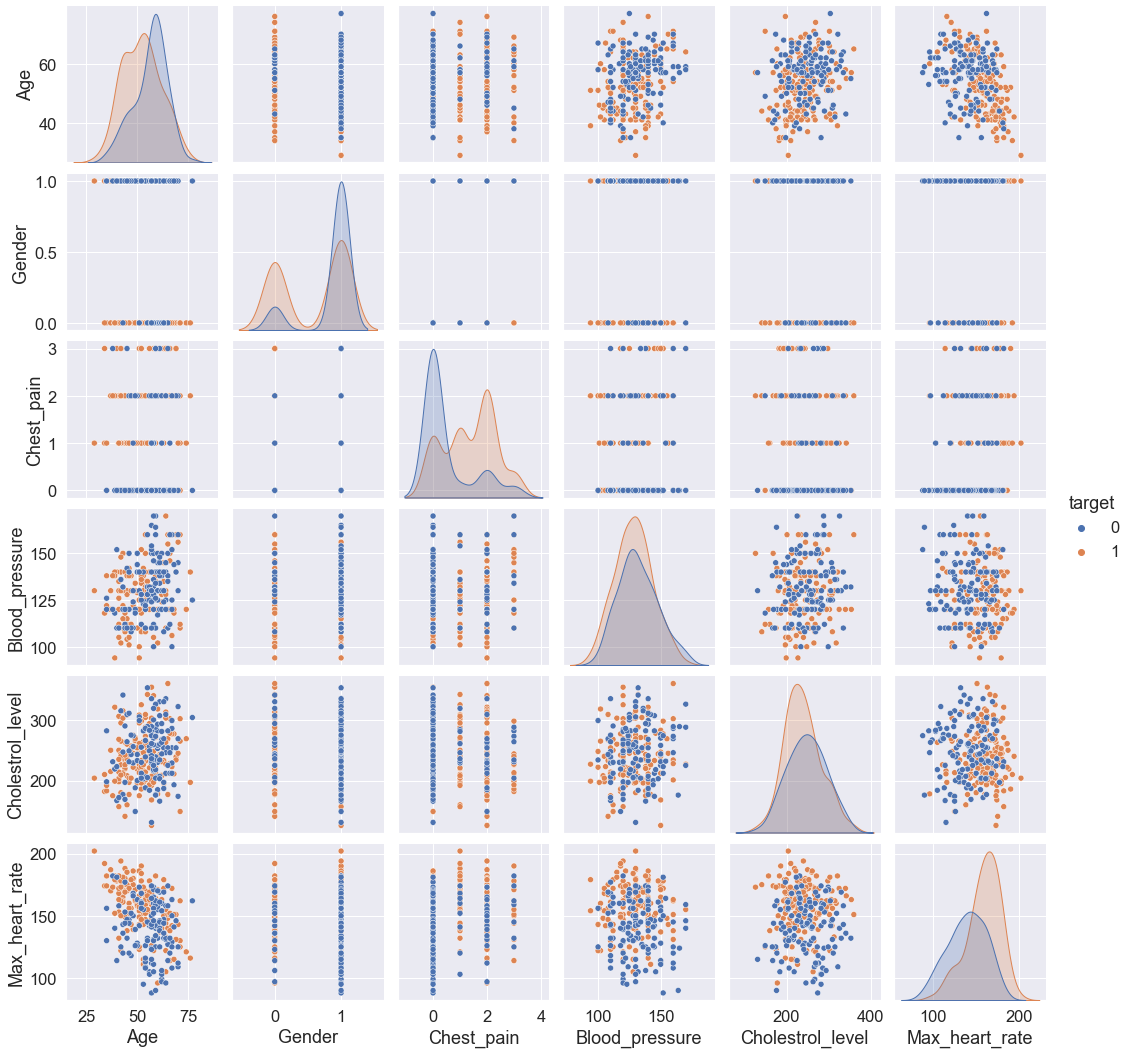

In [38]:
#pairplot of features as per target
sns.pairplot(data=df, hue='target');

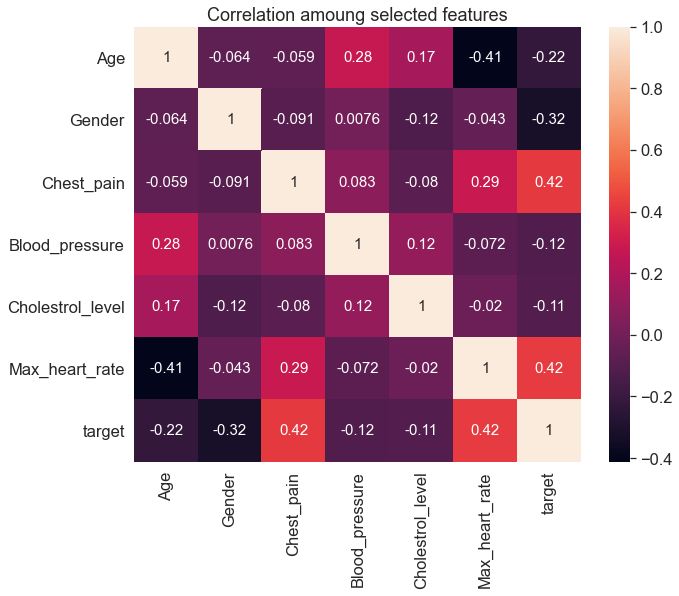

In [39]:
#correlation matrix and plotting heatmap for selected features
corr_matrix1 = df.corr()
top_corr_feature = corr_matrix1.index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_feature].corr(), annot=True, annot_kws={"size":15});
plt.title('Correlation amoung selected features');

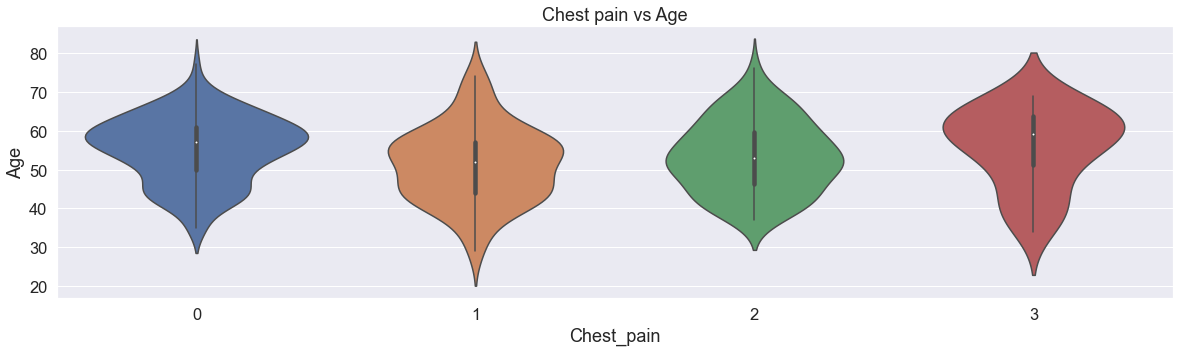

In [40]:
#violinplots for Chest pain vs Age
fig=plt.figure(figsize=(20,5))
sns.violinplot(x ='Chest_pain', y = 'Age', data = df)
plt.title('Chest pain vs Age')
plt.show();

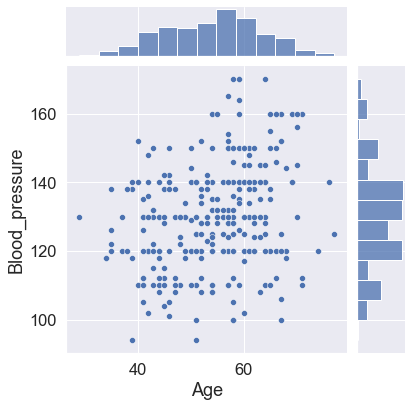

In [63]:
#jointplot for Blood pressure vs age
sns.jointplot(x='Age', y='Blood_pressure', data=df);

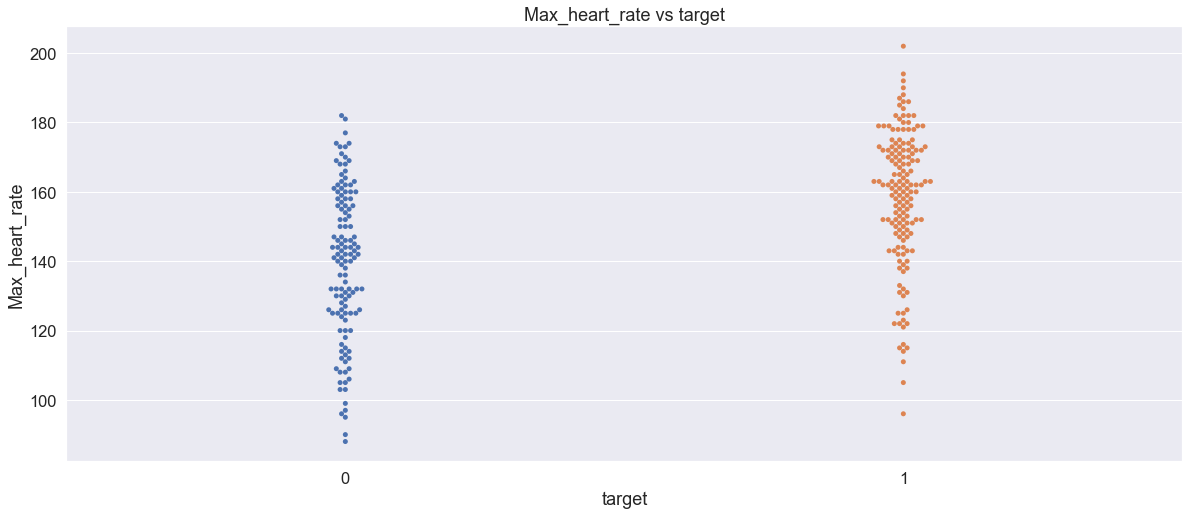

In [64]:
#swarmplots for Max heart rate vs target
fig=plt.figure(figsize=(20,8))
sns.swarmplot(y ='Max_heart_rate', x = 'target', data = df)
plt.title('Max_heart_rate vs target')
plt.show();

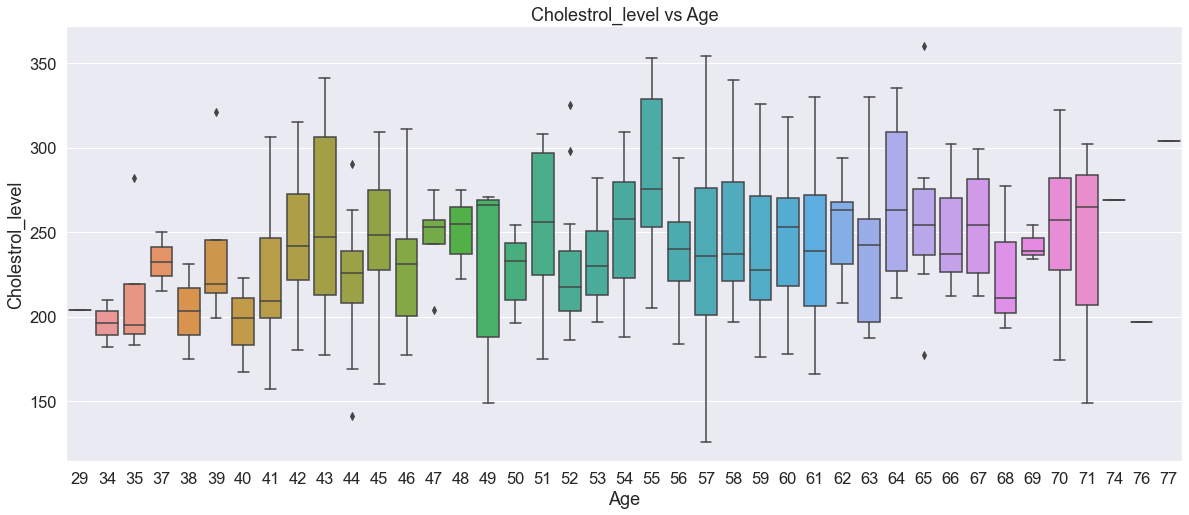

In [65]:
#swarmplots for Cholestrol rate vs Age
fig=plt.figure(figsize=(20,8))
sns.boxplot(x='Age',y='Cholestrol_level',data=df)
plt.title('Cholestrol_level vs Age')
plt.show();

In [66]:
# set value for independent variable x
x=df.iloc[:, :-1]
x

,Age,Gender,Chest_pain,Blood_pressure,Cholestrol_level,Max_heart_rate
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163
...,...,...,...,...,...,...
298,57,0,0,140,241,123
299,45,1,3,110,264,132
300,68,1,0,144,193,141
301,57,1,0,130,131,115


In [67]:
# set value for dependent variable y
y=df.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [258]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(198, 6) (85, 6) (198,) (85,)


## **6. Model Training**
Here we train a Logistic Regression Model to predict whether a person has a heart disease or not based on the following features:
* age
* gender	
* chest pain	
* blood pressure	
* cholesterol level	
* max heart rate

In [259]:
from sklearn.linear_model import LogisticRegression

In [260]:
# create object for the LogisticRegression
model = LogisticRegression()

In [261]:
# apply LogisticRegression to training data
model.fit(x_train, y_train)

LogisticRegression()

In [262]:
# predict for x_test values
y_pred = model.predict(x_test)

In [309]:
# create actual and predicted values dataset and display them
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
267,0,1
91,1,1
161,1,1
167,0,1
165,0,0
...,...,...
4,1,1
41,1,1
191,0,0
3,1,1


# **7. Model evaluation**

In [264]:
#Print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

Accuracy 0.8352941176470589


In [265]:
#Print classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        40
           1       0.79      0.93      0.86        45

    accuracy                           0.84        85
   macro avg       0.85      0.83      0.83        85
weighted avg       0.85      0.84      0.83        85




Confusion Matrix



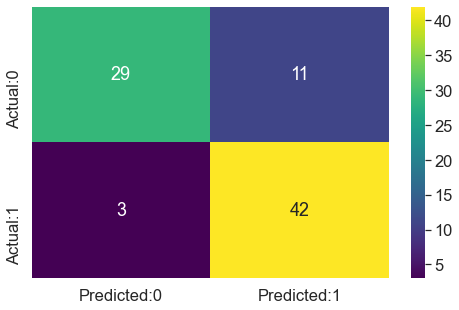

In [277]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
print('\nConfusion Matrix\n')
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="viridis");

In [267]:
#calculting various evaluation metrics 
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('Acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'\nMissclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'\nSensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'\nSpecificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'\nPositive Predictive Value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'\nNegative Predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'\nPositive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'\nNegative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

Acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8352941176470589 
 
Missclassification = 1-Accuracy =  0.16470588235294115 
 
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9333333333333333 
 
Specificity or True Negative Rate = TN/(TN+FP) =  0.725 
 
Positive Predictive Value = TP/(TP+FP) =  0.7924528301886793 
 
Negative Predictive Value = TN/(TN+FN) =  0.90625 
 
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.3939393939393936 
 
Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.09195402298850573


In [268]:
#Error calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('\nMAE, MSE and RMSE for the model : ')
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred)))


MAE, MSE and RMSE for the model : 
Mean Absolute Error : 0.16470588235294117
Mean Squared Error : 0.16470588235294117
Root Mean Squared Error : 0.4058397249567139


**The Plus One Metric: ROC AUC (or Area Under Curve for The Receiver Operating Characteristic (ROC))**

In [269]:
# Calculating class probabilities
pred_proba = [i[1] for i in model.predict_proba(x_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

Area under ROC curve is a performance metric for measuring the ability of a binary classifier to discriminate between positive and negative classes.\
ROC is a probability curve and AUC represents a measure of separability. It tells how much model is capable of distinguishing between classes.

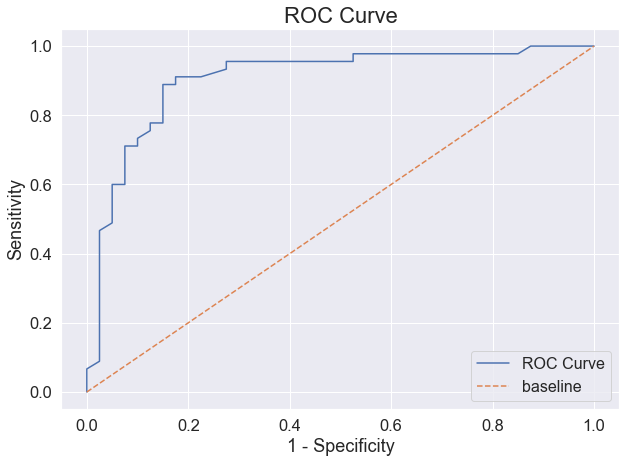

In [270]:
from sklearn.metrics import roc_curve
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. 
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

In [271]:
# calculate area under the curve
from sklearn.metrics import roc_auc_score
print('Area Under Curve(AUC) : ',roc_auc_score(pred_df['true_values'], pred_df['pred_probs']))
print('The closer the AUC to 1 the better is the model.')

Area Under Curve(AUC) :  0.9061111111111111
The closer the AUC to 1 the better is the model.


# **8. Cross Validation**

In [285]:
# defining objects for models and adding them to an array
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
models = []
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('KNeighbors Classifier',KNeighborsClassifier()))
models.append(('Gaussian Naive Bayes',GaussianNB()))
print(models)

[('Logistic Regression', LogisticRegression()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('KNeighbors Classifier', KNeighborsClassifier()), ('Gaussian Naive Bayes', GaussianNB())]


In [286]:
# importing modules neccesary for cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from operator import itemgetter
from numpy import mean,std


Kfold Cross-Validation Results :

Logistic Regression :
Average Accuracy : 0.7676315789473684
Minimum Accuracy : 0.6
Maximum Accuracy : 0.85
Standard Deviation : 0.07491500262116083

Decision Tree Classifier :
Average Accuracy : 0.641578947368421
Minimum Accuracy : 0.4
Maximum Accuracy : 0.75
Standard Deviation : 0.0978777574409122

KNeighbors Classifier :
Average Accuracy : 0.6223684210526315
Minimum Accuracy : 0.5
Maximum Accuracy : 0.7368421052631579
Standard Deviation : 0.0774261331475544

Gaussian Naive Bayes :
Average Accuracy : 0.7426315789473684
Minimum Accuracy : 0.65
Maximum Accuracy : 0.85
Standard Deviation : 0.06417816268090692


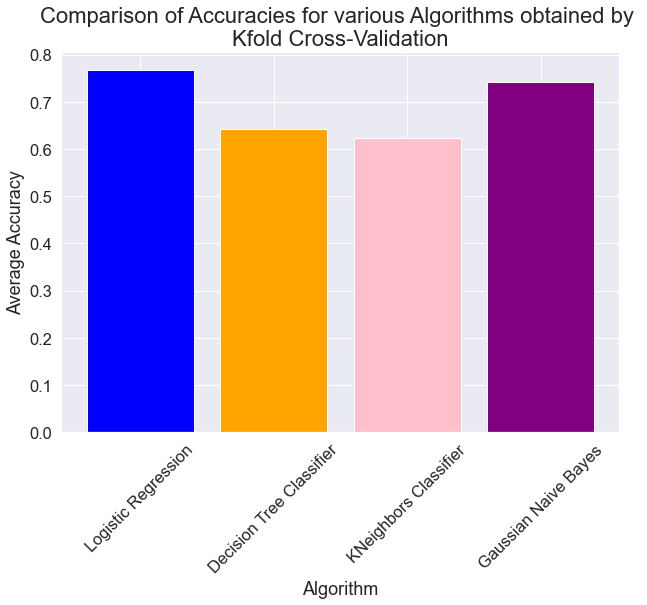

In [290]:
#kfold cross validation
results=dict()

#apply cross validation
for name,mod in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(mod, x_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
    results[name]=(scores.mean(),scores.min(),scores.max(),scores.std())

# print the results
accuracies = []
print('\nKfold Cross-Validation Results :')
for key,value in results.items():
    print('\n'+key+" :")
    print('Average Accuracy :',value[0])
    accuracies.append(value[0])
    print('Minimum Accuracy :',value[1])
    print('Maximum Accuracy :',value[2])
    print('Standard Deviation :',value[3])
    
# visualize the results
plt.figure(figsize = (10,7))
plt.bar(list(map(itemgetter(0), models)),accuracies,color=('blue','orange','pink','purple'));
plt.title("Comparison of Accuracies for various Algorithms obtained by \nKfold Cross-Validation", fontsize=22)
plt.xticks(rotation=45)
plt.ylabel('Average Accuracy', fontsize=18)
plt.xlabel('Algorithm', fontsize=18);


Stratified Kfold Cross-Validation Results :

Logistic Regression :
Average Accuracy : 0.7686842105263157
Minimum Accuracy : 0.6
Maximum Accuracy : 0.9
Standard Deviation : 0.09921750638575433

Decision Tree Classifier :
Average Accuracy : 0.6473684210526316
Minimum Accuracy : 0.5
Maximum Accuracy : 0.8
Standard Deviation : 0.11205088871601984

KNeighbors Classifier :
Average Accuracy : 0.6210526315789473
Minimum Accuracy : 0.5
Maximum Accuracy : 0.7
Standard Deviation : 0.07286195348690547

Gaussian Naive Bayes :
Average Accuracy : 0.7489473684210526
Minimum Accuracy : 0.6
Maximum Accuracy : 0.9473684210526315
Standard Deviation : 0.1193426130088427


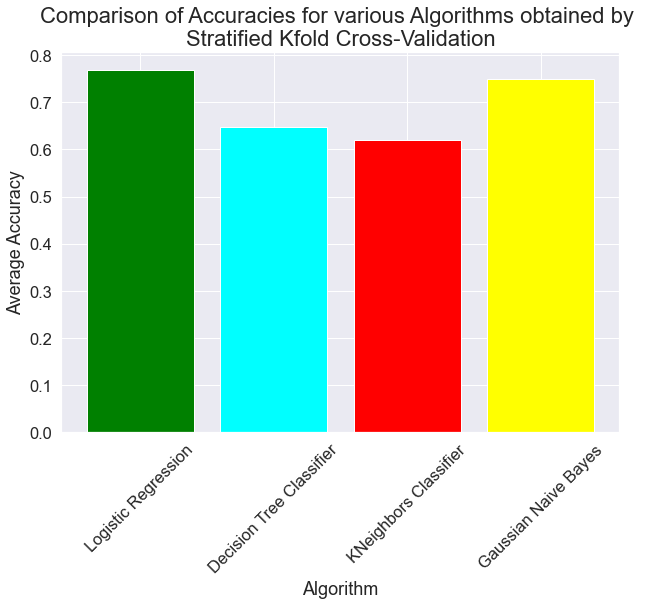

In [291]:
#Stratified kfold cross validation
results1=dict()
for name,mod in models:
    skfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(mod, x_train, y_train, scoring='accuracy', cv=skfold, n_jobs=-1)
    results1[name]=(scores.mean(),scores.min(),scores.max(),scores.std())

# print the results    
accuracies1 = []
print('\nStratified Kfold Cross-Validation Results :')
for key,value in results1.items():
    print('\n'+key+" :")
    print('Average Accuracy :',value[0])
    accuracies1.append(value[0])
    print('Minimum Accuracy :',value[1])
    print('Maximum Accuracy :',value[2])
    print('Standard Deviation :',value[3])
    
# visualize the results
plt.figure(figsize = (10,7))
plt.bar(list(map(itemgetter(0), models)),accuracies1,color=('green','cyan','red','yellow'));
plt.title("Comparison of Accuracies for various Algorithms obtained by \nStratified Kfold Cross-Validation", fontsize=22)
plt.xticks(rotation=45)
plt.ylabel('Average Accuracy', fontsize=18)
plt.xlabel('Algorithm', fontsize=18);   

# **9. Building a Predictive System**

Enter your name : Yash
Enter your age : 63
Enter your gender("M/F") : M
Enter chest pain : 3
Enter blood pressure : 145
Enter cholesterol level : 233
Enter maximum heart rate : 150

Yash your reports are as follows : 

Predicted value :  [1]

Yash your reports are not normal.
You have a heart disease


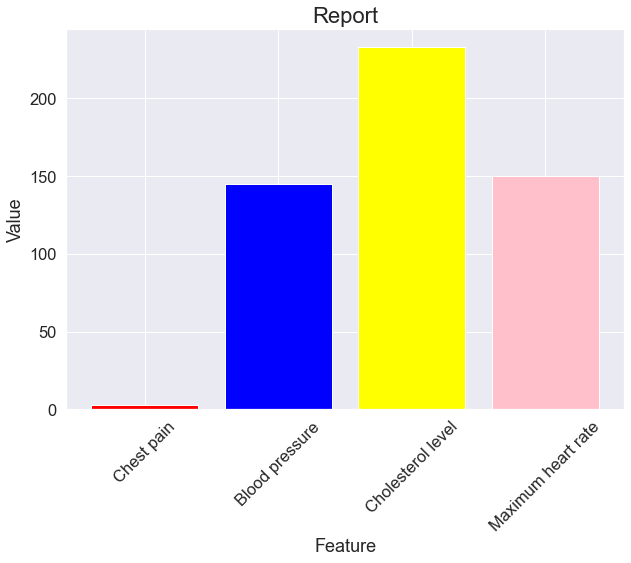

In [289]:
#take input from user
name = input('Enter your name : ')
age = int(input('Enter your age : '))
gender = input('Enter your gender("M/F") : ')
cp = int(input('Enter chest pain : '))
bp = int(input('Enter blood pressure : '))
chol = int(input('Enter cholesterol level : '))
hr = int(input('Enter maximum heart rate : '))

report =[cp, bp,chol,hr]
feature = ['Chest pain', 'Blood pressure', 'Cholesterol level', 'Maximum heart rate']

if gender == 'M':
    gen = 1
    
input_data = (age,gen,cp,bp,chol,hr)
#input_data = (63,1,3,145,233,150) having heart disease
#input_data = (57,1,0,130,131,115) not having heart disease

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print('\n'+name+' your reports are as follows : ')

prediction = model.predict(input_data_reshaped)
print('\nPredicted value : ',prediction)

plt.figure(figsize = (10,7))
plt.bar(feature,report,color=('red','blue','yellow','pink'));
plt.title("Report", fontsize=22)
plt.xticks(rotation=45)
plt.ylabel('Value', fontsize=18)
plt.xlabel('Feature', fontsize=18)

if (prediction[0]== 0):
  print("\n"+name+' your reports are normal.\nYou do not have a heart disease.')
else:
  print("\n"+name+' your reports are not normal.\nYou have a heart disease')